In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure classification_vs_clustering_plot


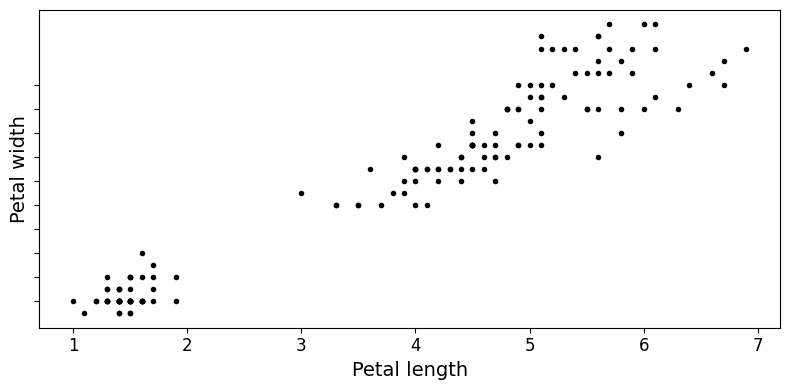

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(8, 4))

# plt.subplot(121)
# plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
# plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
# plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
# plt.xlabel("Petal length", fontsize=14)
# plt.ylabel("Petal width", fontsize=14)
# plt.legend(fontsize=12)

# plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)
# set the labels on the x axis to show the petal length in cm

save_fig("classification_vs_clustering_plot")
plt.show()

# K-Means

In [9]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [13]:
kmeans.cluster_centers_

# only show the petal width and length
X_new = X[:, 2:4]
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X_new)
kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

Saving figure voronoi_plot


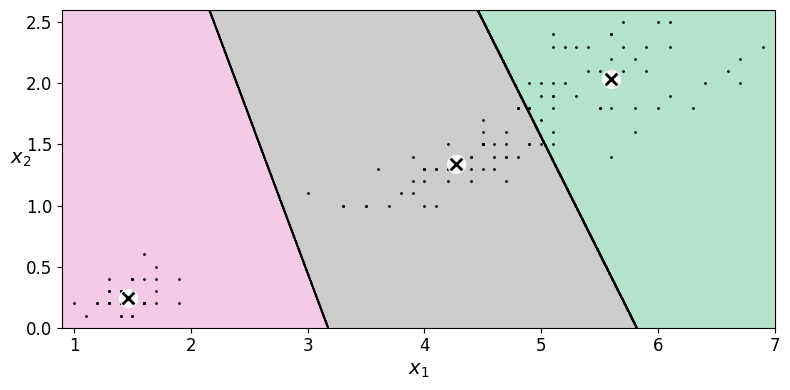

In [16]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)



plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_new)
save_fig("voronoi_plot")
plt.show()

In [17]:
kmeans.inertia_

31.371358974358984

In [28]:
# do 10 fits on different random initializations
kmeans_rnd_10_inits = KMeans(n_clusters=3, n_init=10, init="random", random_state=42)
kmeans_rnd_10_inits.fit(X_new)
kmeans_rnd_10_inits.inertia_

31.371358974358984

Saving figure voronoi_plot2


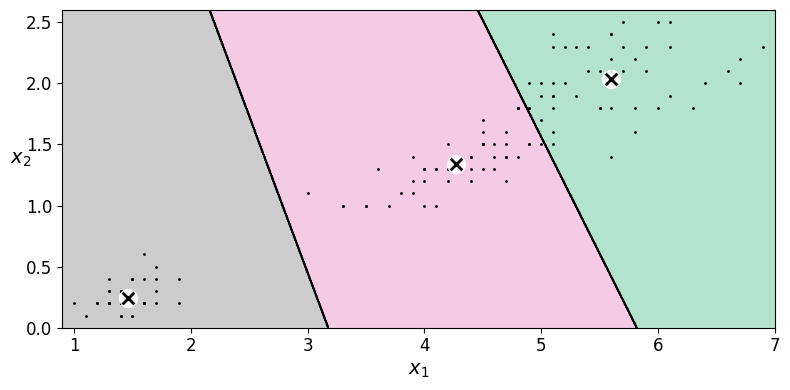

In [26]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X_new)
save_fig("voronoi_plot2")
plt.show()

In [ ]:
from sklearn.cluster import MiniBatchKMeans
minibatch = MiniBatchKMeans(n_clusters=3, random_state=42)
minibatch.fit(X_new)
minibatch.inertia_

31.478981343247693

Saving figure inertia_vs_k_plot


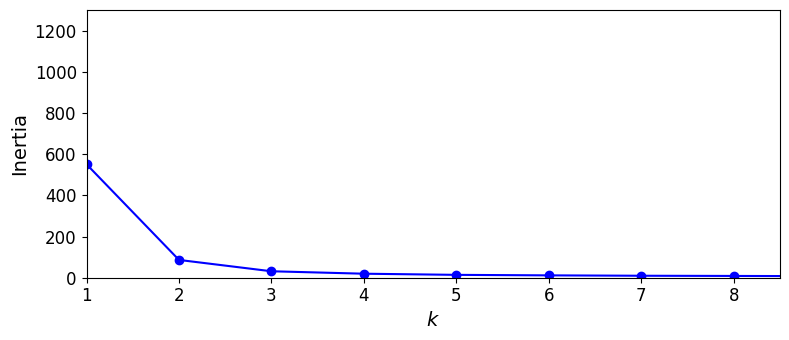

In [30]:
# test out different numbers of clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_new)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

Saving figure silhouette_score_vs_k_plot


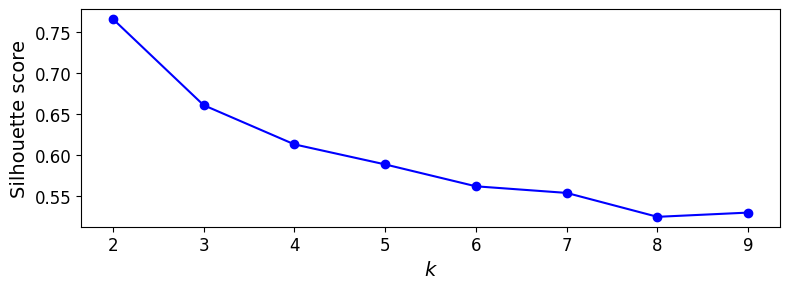

In [ ]:
# do silhouette score
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X_new, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
save_fig("silhouette_score_vs_k_plot")
plt.show()

Saving figure silhouette_analysis_plot


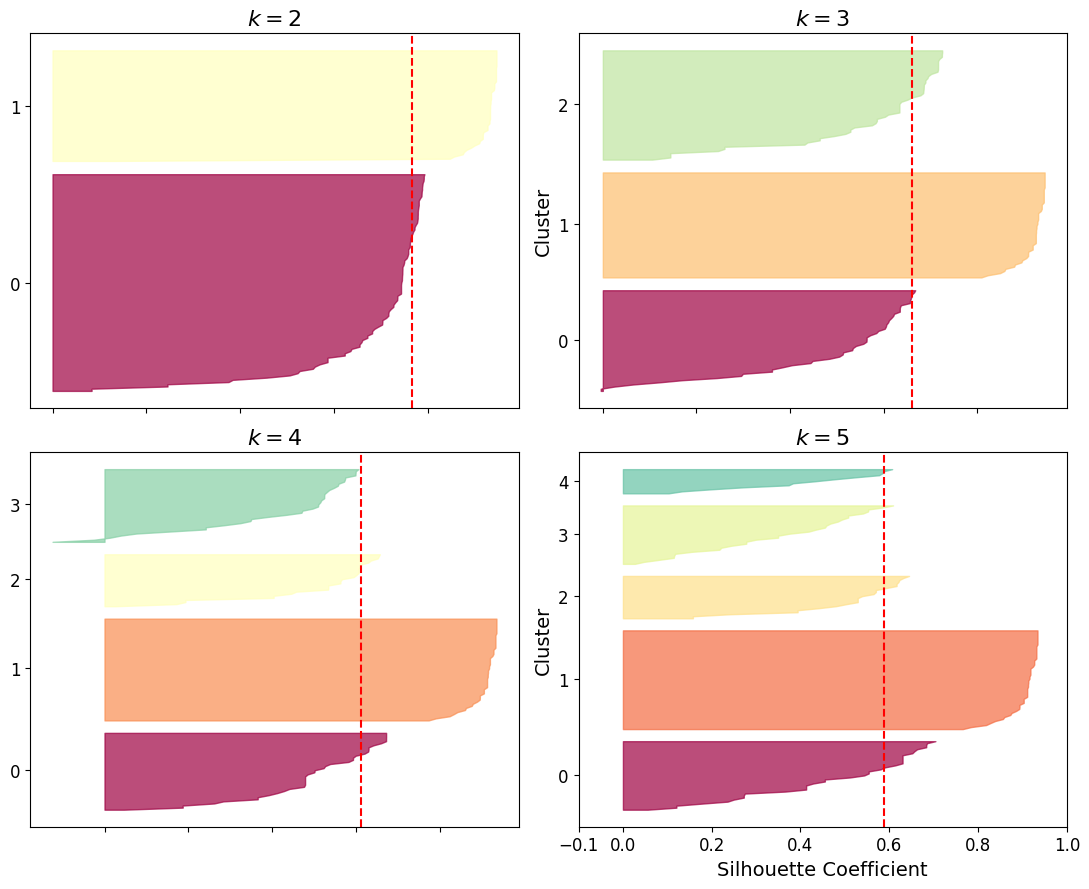

In [38]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for idx, k in enumerate((2, 3, 4, 5)):
    plt.subplot(2, 2, idx + 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_new, y_pred)  # <-- use X_new here

    padding = len(X_new) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()